<a href="https://colab.research.google.com/github/himanshu-408/Animal-Shelter/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
df=pd.read_csv('india_2.csv')

In [ ]:
df.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
17589,1955-04-01,27.835,0.215,Jaipur,India,26.52N,75.22E
22886,1961-03-01,24.409,0.473,Lakhnau,India,26.52N,80.60E
5671,1833-02-01,24.100,1.627,Bombay,India,18.48N,72.68E
15617,2008-09-01,26.898,0.223,Hyderabad,India,16.87N,78.70E
30999,1984-01-01,13.895,0.494,New Delhi,India,28.13N,77.27E


In [ ]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [ ]:
df['dt'] = df['dt'].str.strip()
df.index = pd.to_datetime(df.dt, format='%Y-%d-%m')
df = df.drop(columns=['dt'])

In [ ]:
df.sample(10)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1865-01-09,26.774,1.220,Nagpur,India,21.70N,78.75E
1971-01-02,17.708,0.510,Delhi,India,28.13N,77.27E
1816-01-07,26.727,1.774,Ahmadabad,India,23.31N,72.52E
1881-01-04,30.393,0.597,Calcutta,India,23.31N,88.25E
1813-01-11,25.057,3.215,Madras,India,13.66N,80.09E
1941-01-04,31.288,0.357,Surat,India,21.70N,73.56E
1802-01-11,20.134,1.998,New Delhi,India,28.13N,77.27E
1832-01-06,NaN,NaN,Pune,India,18.48N,74.37E
1926-01-10,26.197,0.276,Hyderabad,India,16.87N,78.70E


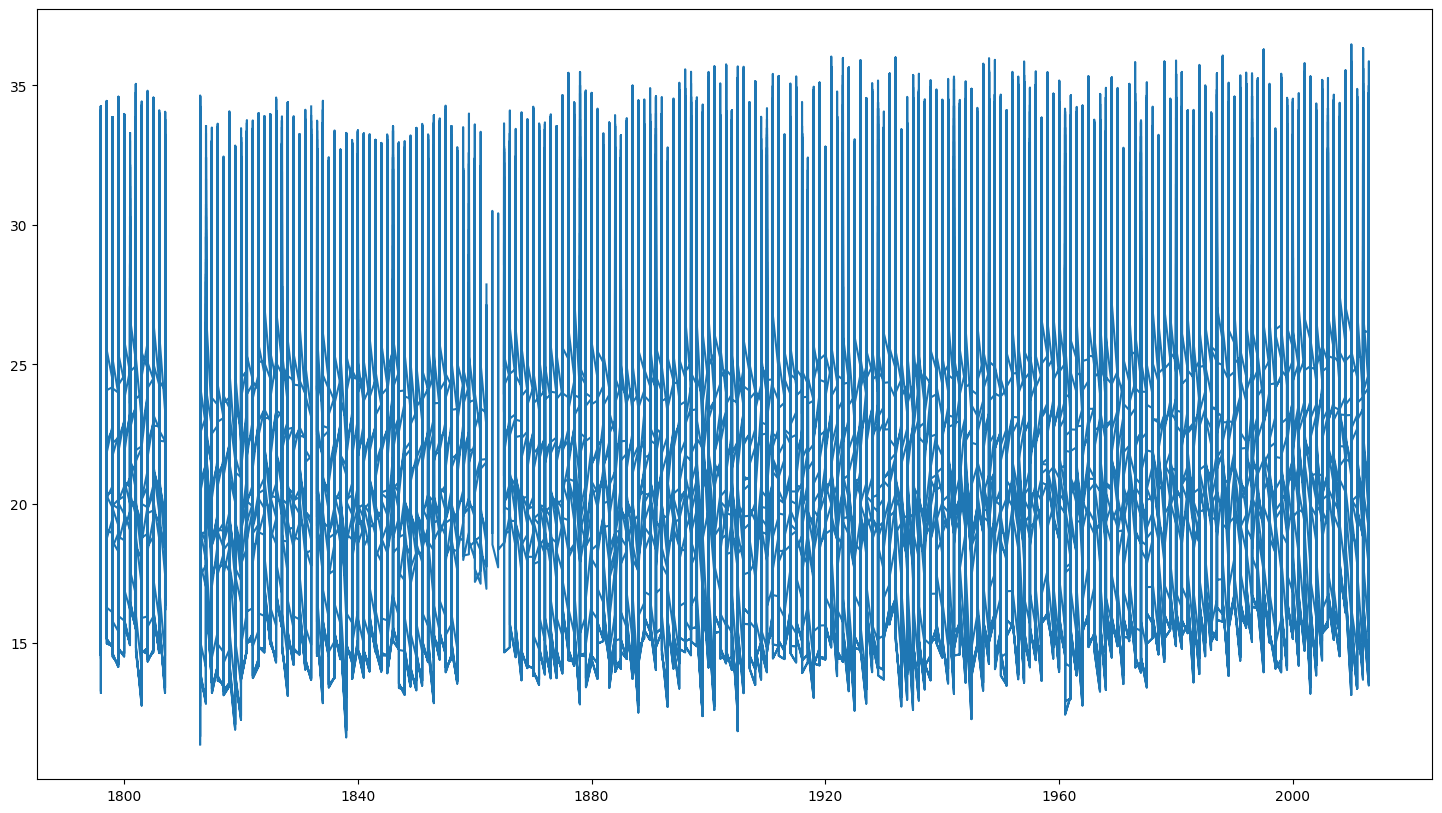

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df['AverageTemperature'])
plt.show()

In [ ]:
number_missing_values = df['AverageTemperature'].isnull().sum()
print(f"Number of missing values in 'AverageTemperature': {number_missing_values}")

Number of missing values in 'AverageTemperature': 1955


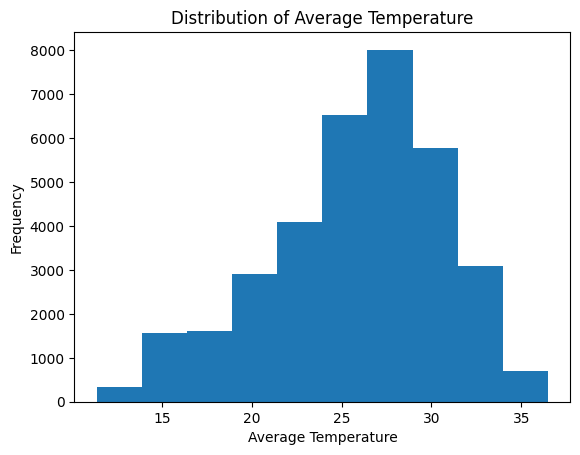

In [ ]:
plt.hist(df['AverageTemperature'])
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature')
plt.show()

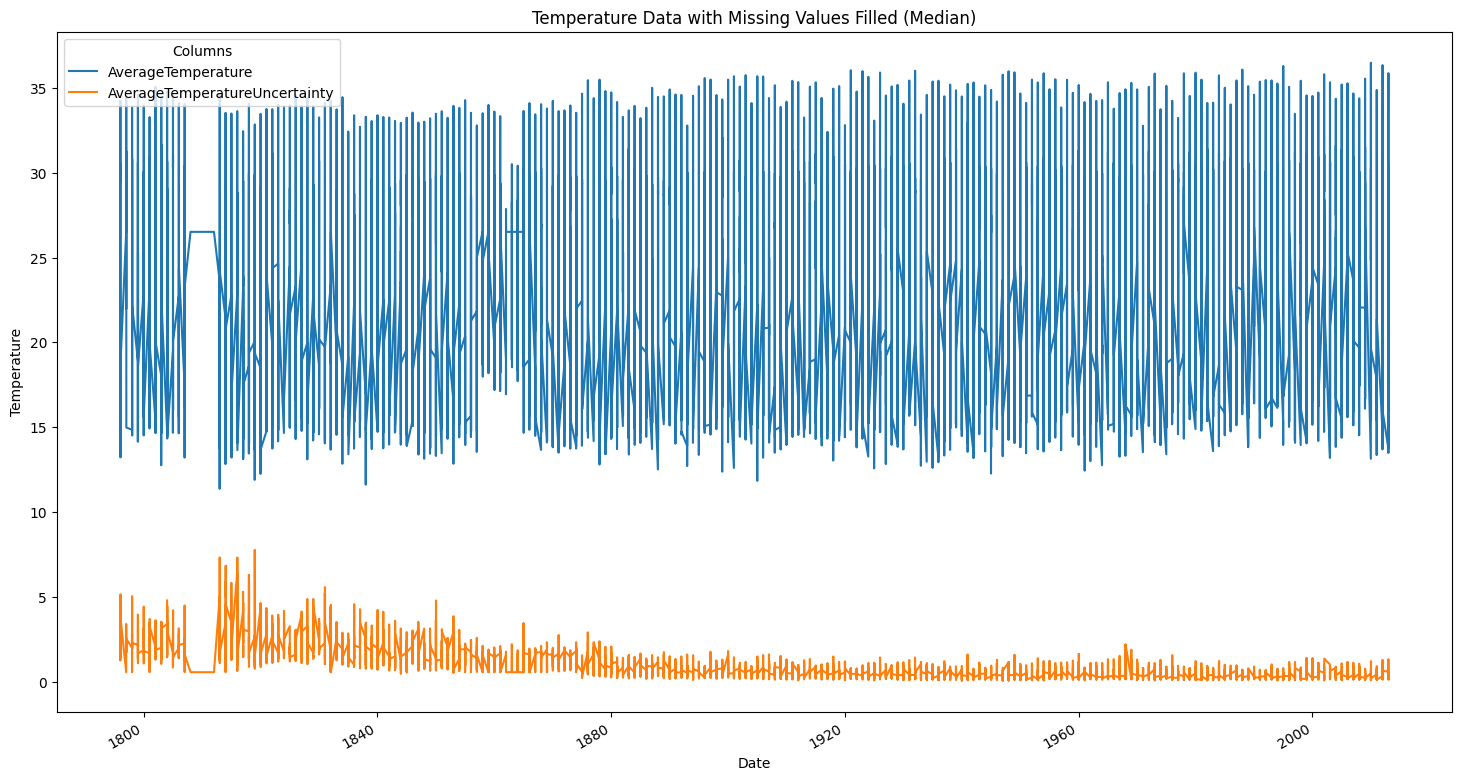

In [ ]:
import pandas as pd

def fill_missing_values_median(data):
    """
    Fill missing values in a time series DataFrame using median imputation.

    Parameters:
    - data: pandas DataFrame containing time series data with missing values

    Returns:
    - pandas DataFrame with missing values filled using median imputation
    """
    # Fill missing values with median
    df = data.fillna(data.median())

    return df

# Example usage:
# Assuming 'temperature_data' is your DataFrame with temperature data
# Replace 'temperature_data' with your actual DataFrame

# Fill missing values with median
df = fill_missing_values_median(df[['AverageTemperature', 'AverageTemperatureUncertainty']])

# Plot the filled data
df.plot(figsize=(18, 10))
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Data with Missing Values Filled (Median)')
plt.legend(title='Columns')
plt.show()


In [ ]:
number_missing_values = df['AverageTemperature'].isnull().sum()
print(f"Number of missing values in 'AverageTemperature': {number_missing_values}")

Number of missing values in 'AverageTemperature': 0


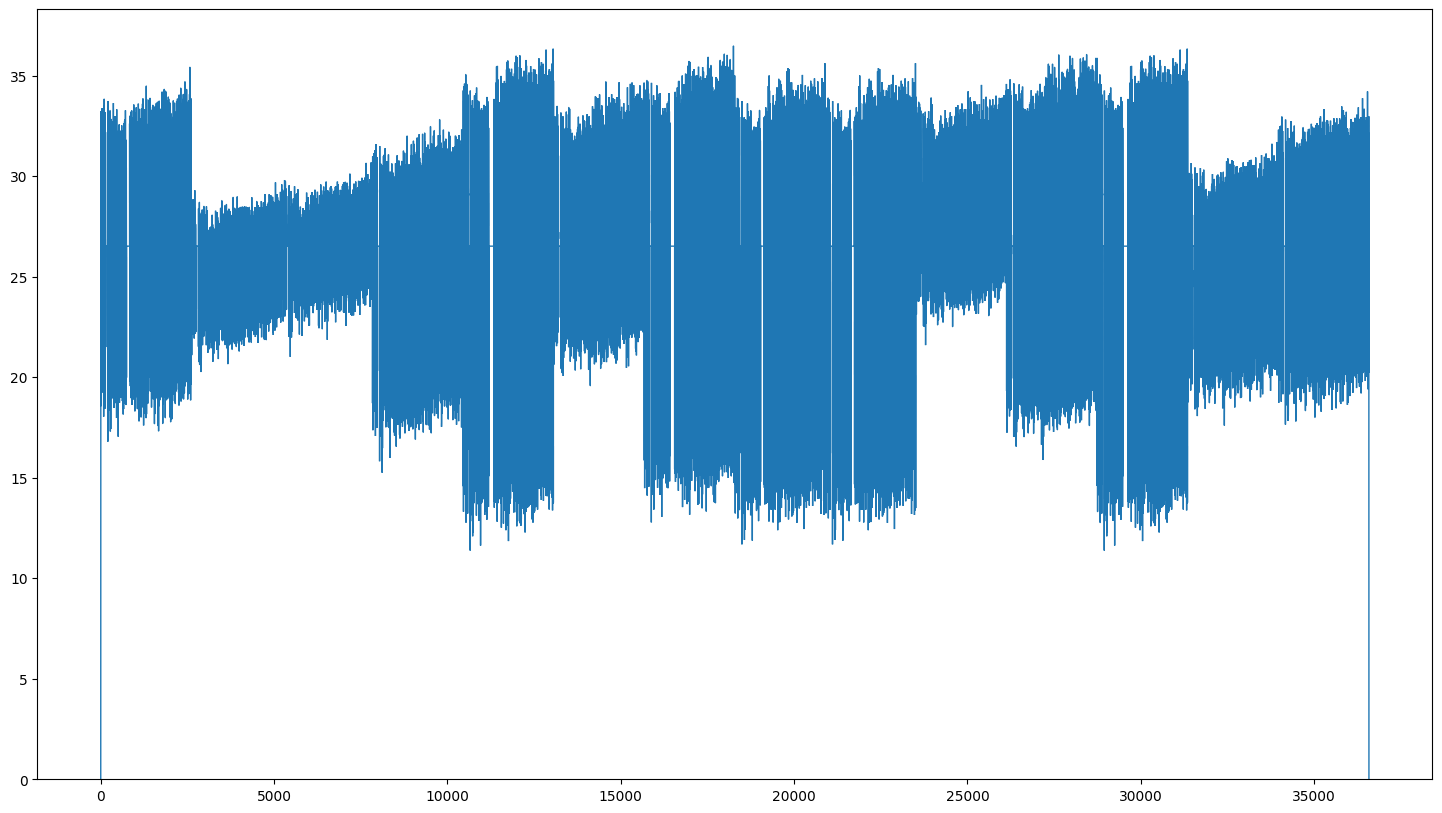

In [ ]:
plt.figure(figsize=(18,10))
plt.stairs(df['AverageTemperature'])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'df' is your DataFrame and 'AverageTemperature' is the column you want to test for stationarity
result = adfuller(df['AverageTemperature'])

# Extracting test statistic and p-value
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpretation
if p_value <= 0.05:
    print("Reject the null hypothesis (H0): Data is stationary")
else:
    print("Fail to reject the null hypothesis (H0): Data is non-stationary")


ADF Statistic: -7.172559761902188
p-value: 2.780055856819893e-10
Reject the null hypothesis (H0): Data is stationary


In [ ]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1796-01-01,19.649,2.286
1796-01-02,21.632,1.770
1796-01-03,24.953,2.427
1796-01-04,30.297,1.827
1796-01-05,33.223,1.496


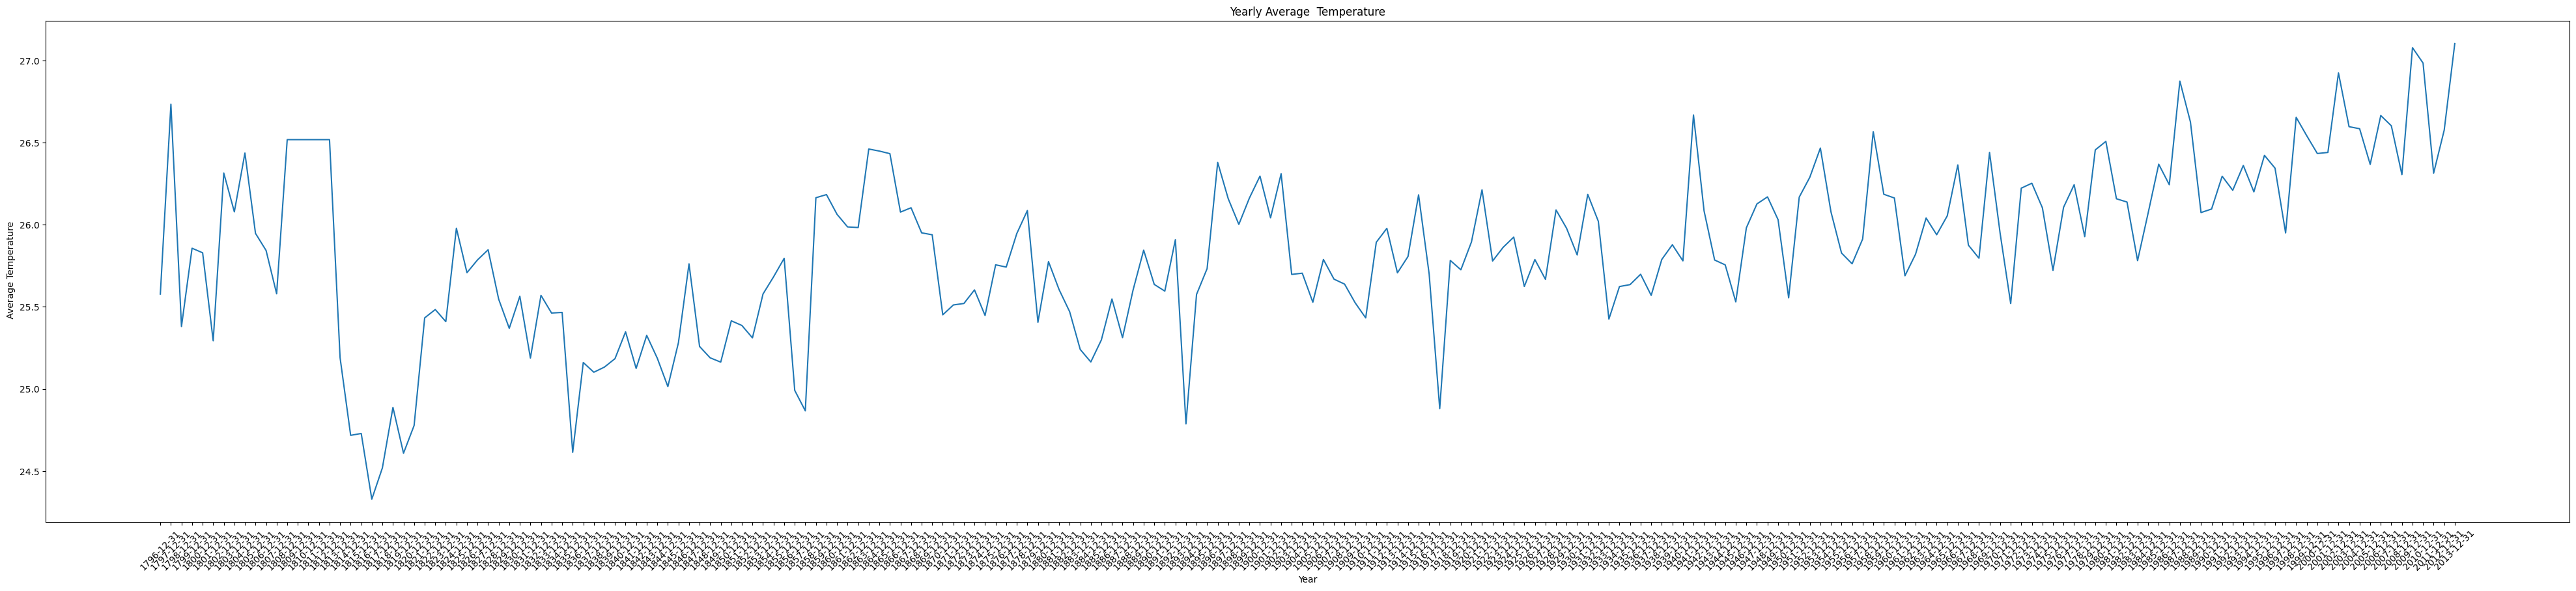

In [ ]:

df['Year'] = df.index.year

yearly_data = df['AverageTemperature'].resample('Y').mean()

yearly_data.index = yearly_data.index.strftime('%Y-%m-%d')

plot_data = pd.DataFrame({'AverageTemperature': yearly_data.values}, index=yearly_data.index)

plt.figure(figsize=(50, 10))
plt.plot(plot_data.index, plot_data['AverageTemperature'])
plt.xlabel('Year')
plt.ylabel(' Average Temperature')
plt.title('Yearly Average  Temperature')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.sample(10)

,AverageTemperature,AverageTemperatureUncertainty,Year
dt,,,
2004-01-01,15.923,0.534,2004
1814-01-01,18.633,2.947,1814
1950-01-01,20.531,0.506,1950
2001-01-02,24.375,0.527,2001
1881-01-09,28.345,0.472,1881
1929-01-06,32.718,0.621,1929
1895-01-10,25.480,0.348,1895
1871-01-09,24.251,0.716,1871
2009-01-08,27.262,0.213,2009


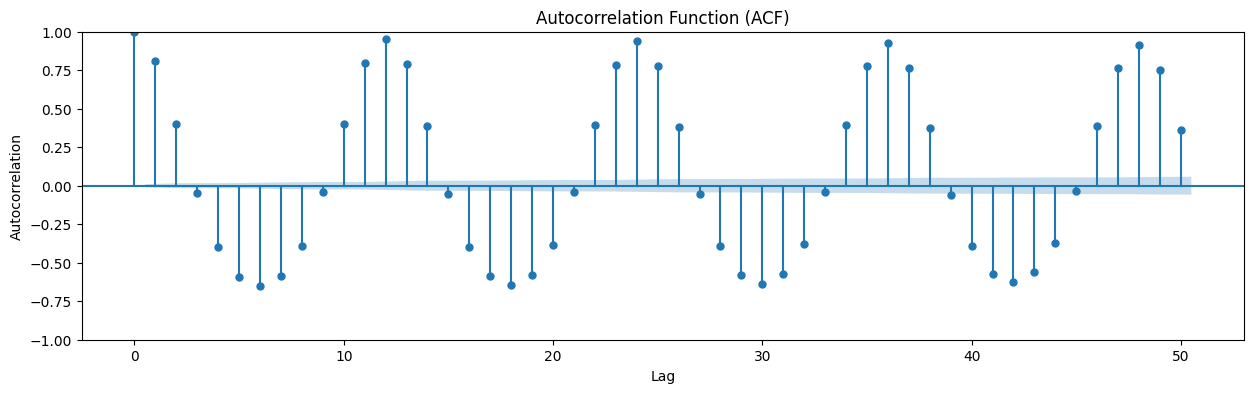

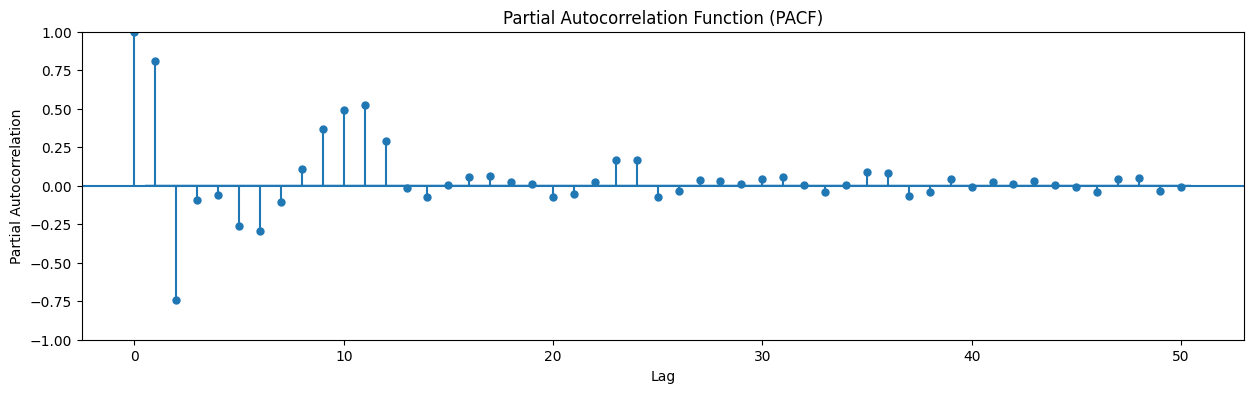

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'df' is your dfFrame with 'dt' as the index and 'AverageTemperature' as the column
# Replace 'df' with your actual dfFrame

# Plot ACF
plt.figure(figsize=(15, 4))
plot_acf(df['AverageTemperature'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(15, 4))
plot_pacf(df['AverageTemperature'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [ ]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
# suppress_warnings=True)

#2 , 1 , 4

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                29265
Model:                 ARIMA(2, 1, 4)   Log Likelihood              -54359.077
Date:                Tue, 14 May 2024   AIC                         108732.153
Time:                        09:57:03   BIC                         108790.142
Sample:                             0   HQIC                        108750.782
                              - 29265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7309      0.001   2685.887      0.000       1.730       1.732
ar.L2         -0.9978      0.001  -1615.719      0.000      -0.999      -0.997
ma.L1         -2.0460      0.004   -546.401      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


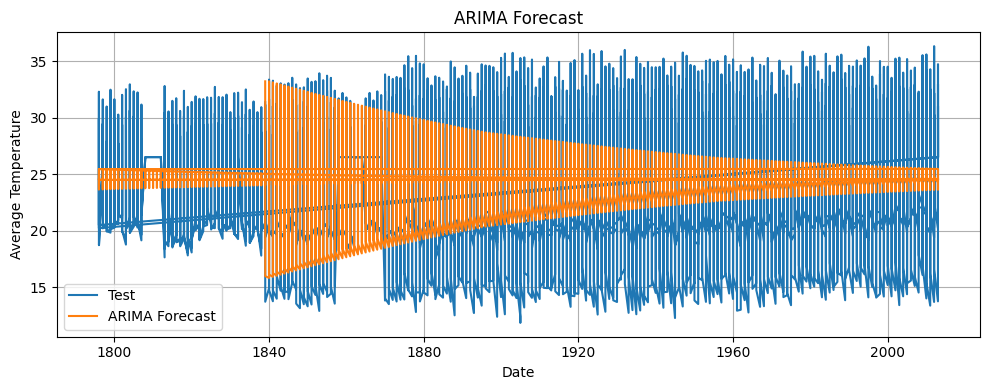

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

train_temp = train_data['AverageTemperature']
test_temp = test_data['AverageTemperature']

# Define and fit the ARIMA model
model = ARIMA(train_temp, order=(2, 1, 4))
model_fit = model.fit()

# Print the model summary (optional)
print(model_fit.summary())

# Forecast
y_hat = model_fit.forecast(steps=len(test_data))

# Plot the prediction vs test data
plt.figure(figsize=(10, 4))
plt.plot(test_data.index, test_temp, label='Test')
plt.plot(test_data.index, y_hat, label='ARIMA Forecast')

plt.legend(loc='best')
plt.title("ARIMA Forecast")
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_temp, y_hat)

mse = mean_squared_error(test_temp, y_hat)



print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')


Mean Absolute Error (MAE): 3.452597061029325
Mean Squared Error (MSE): 17.841993000837263
